In [8]:
import sacpy as scp
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import sacpy.Map
import cartopy.crs as ccrs

In [12]:
sst = scp.load_sst()['sst'].loc["1991":"2021", -20:30, 150:275]
ssta = scp.get_anom(sst)
u = scp.load_10mwind()['u']
v = scp.load_10mwind()['v']

uua = scp.get_anom(u)
vua = scp.get_anom(v)
uv = np.concatenate([np.array(uua)[...,np.newaxis],np.array(vua)[...,np.newaxis]],axis=-1)
# uua
uv.shape

(372, 11, 26, 2)

In [13]:
svd = scp.SVD(ssta,uv,complex=False)
svd.solve()

In [14]:
ptl, ptr = svd.get_pt(3)
pcl,pcr = svd.get_pc(3)

In [15]:
ptl.shape,ptr.shape

((3, 11, 26), (3, 11, 26, 2))

In [16]:
upt ,vpt = ptr[...,0] , ptr[...,1]
sst_pt = ptl

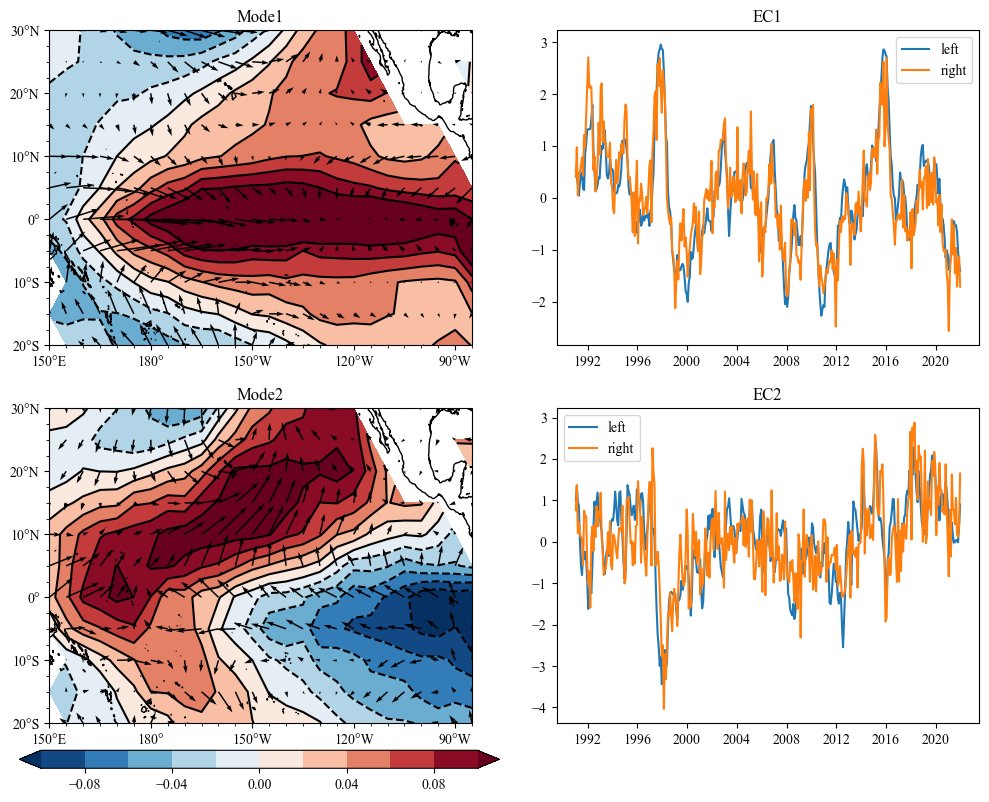

In [17]:
import cartopy.crs as ccrs
import sacpy.Map
lon , lat = np.array(ssta.lon) , np.array(ssta.lat)
fig = plt.figure(figsize=[12,9])
# ==========================================================
ax = fig.add_subplot(221,projection=ccrs.PlateCarree(central_longitude=180))
m1 = ax.scontourf(lon,lat,sst_pt[0],cmap='RdBu_r',levels=np.linspace(-0.1,0.1,11),extend="both")
ax.scontour(m1,colors="black")
ax.squiver(lon,lat,upt[0],vpt[0])
ax.init_map(smally=2.5)
ax.set_title("Mode1")
# 
ax2 = fig.add_subplot(222)
ax2.plot(sst.time,pcl[0],label="left")
ax2.plot(sst.time,pcr[0],label="right")
ax2.legend()
ax2.set_title("EC1")
# 
ax3 = fig.add_subplot(223,projection=ccrs.PlateCarree(central_longitude=180))
m2 = ax3.scontourf(lon,lat,sst_pt[1],cmap='RdBu_r',levels=np.linspace(-0.1,0.1,11),extend="both")
ax3.squiver(lon,lat,upt[1],vpt[1])
ax3.scontour(m2,colors="black")
ax3.init_map(smally=2.5)
ax3.set_title("Mode2")
ax4 = fig.add_subplot(224)
ax4.plot(sst.time,pcl[1],label="left")
ax4.plot(sst.time,pcr[1],label="right")
ax4.legend()
ax4.set_title("EC2")
cb_ax = fig.add_axes([0.1,0.06,0.4,0.02])
fig.colorbar(m1,cax=cb_ax,orientation="horizontal")

In [18]:
scp.LinReg(pcl[0],pcr[0]).corr

array(0.86045202)

In [19]:
scp.LinReg(pcl[1],pcr[1]).corr

array(0.73487196)